In [51]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates
from math import sqrt
import numpy as np
import pandas as pd
import warnings

# Suppress the warning
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

path = "D:\\AI_data_analysis\\CY\\"

In [52]:
Long_position_df = pd.read_csv(
    path + "Long_position_df_Ensemble.csv",
    parse_dates=["trade_date"],
    index_col="trade_date",
)
Long_position_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 303 entries, 2022-12-26 to 2024-03-27
Columns: 3214 entries, 000001.SZ to Monday
dtypes: float64(3213), int64(1)
memory usage: 7.4 MB


In [53]:
Long_position_df_Monday = Long_position_df[Long_position_df['Monday'] != 0]

In [54]:
Long_position_df_Monday.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2022-12-26 to 2024-03-25
Columns: 3214 entries, 000001.SZ to Monday
dtypes: float64(3213), int64(1)
memory usage: 1.5 MB


In [55]:
# SWClass = pd.read_excel(path + 'StockClassifyUse_stock.xls')
# SWClass['股票代码'] = SWClass['股票代码'].astype(str).str.zfill(6)

# # Find the index of the latest date for each stock
# latest_dates_idx = SWClass.groupby('股票代码')['计入日期'].idxmax()
# # Filter the DataFrame to keep only the rows with the latest date for each stock
# latest_stocks_df = SWClass.loc[latest_dates_idx].reset_index(drop=True)

# Industry_code = pd.read_excel(path + 'SwClassCode_2021.xls')
# Industry_code.fillna('/', inplace=True)
# SWClass_all = pd.merge(latest_stocks_df, Industry_code, on='行业代码', how='left')

# # Function to transfer stock code based on rules
# def transfer_stock_code(code):
#     if code.startswith('0'):
#         return code + '.SZ'
#     elif code.startswith('6'):
#         return code + '.SH'
#     elif code.startswith('8'):
#         return code + '.BJ'
#     else:
#         return code

# # Apply the function using a lambda function
# SWClass_all['股票代码'] = SWClass_all['股票代码'].apply(lambda x: transfer_stock_code(x))
# SWClass_all.to_csv(path + 'SWClass_all.csv', index=False)

In [56]:
SWClass_all = pd.read_csv(path + 'SWClass_all.csv')
SWClass_all

,股票代码,计入日期,行业代码,更新日期,一级行业名称,二级行业名称,三级行业名称
0,000001.SZ,2021-07-30 00:00:00,480301,2021-07-31 16:18:00,银行,股份制银行Ⅱ,股份制银行Ⅲ
1,000002.SZ,1991-01-29 00:00:00,430101,2015-10-27 15:29:00,房地产,房地产开发,住宅开发
2,000003.SZ,1991-04-14 00:00:00,510101,2015-10-27 15:28:00,综合,综合Ⅱ,综合Ⅲ
3,000004.SZ,2021-07-30 00:00:00,710402,2021-07-31 16:18:00,计算机,软件开发,横向通用软件
4,000005.SZ,2021-07-30 00:00:00,760104,2022-10-11 14:51:00,环保,环境治理,综合环境治理
...,...,...,...,...,...,...,...
5613,873706.BJ,2024-03-12 00:00:00,640601,2024-03-13 08:54:00,机械设备,工程机械,工程机械整机
5614,873726.BJ,2023-10-30 00:00:00,640209,2023-10-30 10:45:00,机械设备,专用设备,其他专用设备
5615,873806.BJ,2024-01-17 00:00:00,710301,2024-01-17 16:55:00,计算机,IT服务Ⅱ,IT服务Ⅲ
5616,873833.BJ,2023-11-20 00:00:00,640106,2023-11-20 17:39:00,机械设备,通用设备,其他通用设备


In [57]:
SWClass_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5618 entries, 0 to 5617
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   股票代码    5618 non-null   object
 1   计入日期    5618 non-null   object
 2   行业代码    5618 non-null   int64 
 3   更新日期    5618 non-null   object
 4   一级行业名称  5529 non-null   object
 5   二级行业名称  5529 non-null   object
 6   三级行业名称  5529 non-null   object
dtypes: int64(1), object(6)
memory usage: 307.4+ KB


In [58]:
Class = SWClass_all[['股票代码', '一级行业名称', '二级行业名称', '三级行业名称']]
Class

,股票代码,一级行业名称,二级行业名称,三级行业名称
0,000001.SZ,银行,股份制银行Ⅱ,股份制银行Ⅲ
1,000002.SZ,房地产,房地产开发,住宅开发
2,000003.SZ,综合,综合Ⅱ,综合Ⅲ
3,000004.SZ,计算机,软件开发,横向通用软件
4,000005.SZ,环保,环境治理,综合环境治理
...,...,...,...,...
5613,873706.BJ,机械设备,工程机械,工程机械整机
5614,873726.BJ,机械设备,专用设备,其他专用设备
5615,873806.BJ,计算机,IT服务Ⅱ,IT服务Ⅲ
5616,873833.BJ,机械设备,通用设备,其他通用设备


In [59]:
# Create a dictionary mapping stock codes to industries
industry_first_dict = dict(zip(Class['股票代码'], Class['一级行业名称']))
industry_second_dict = dict(zip(Class['股票代码'], Class['二级行业名称']))
industry_third_dict = dict(zip(Class['股票代码'], Class['三级行业名称']))

# Use apply function with a lambda function to map stock codes to industries
# Long_position_df_Monday = Long_position_df_Monday.apply(lambda x: x.map(industry_dict))

In [60]:
# Drop Monday column
var_names = Long_position_df_Monday.columns.drop("Monday")

# Reshape the DataFrame
position_df_long = Long_position_df_Monday.reset_index().melt(
    id_vars="trade_date", value_vars=var_names, var_name='ts_code'
)
position_df_long = position_df_long.sort_values(by="trade_date").reset_index(drop=True)

# Drop rows where 'value' column is 0
position_df_long = position_df_long[position_df_long['value'] != 0]
position_df_long.reset_index(drop=True, inplace=True)
position_df_long = position_df_long.drop(columns=['value'])
# Add industry columns
position_df_long['industry_sw_first'] = position_df_long['ts_code'].map(industry_first_dict)
position_df_long['industry_sw_second'] = position_df_long['ts_code'].map(industry_second_dict)
position_df_long['industry_sw_third'] = position_df_long['ts_code'].map(industry_third_dict)
position_df_long

,trade_date,ts_code,industry_sw_first,industry_sw_second,industry_sw_third
0,2023-01-09,600225.SH,计算机,IT服务Ⅱ,IT服务Ⅲ
1,2023-01-09,002467.SZ,通信,通信服务,通信应用增值服务
2,2023-01-09,002745.SZ,电子,光学光电子,LED
3,2023-01-09,002707.SZ,社会服务,旅游及景区,旅游综合
4,2023-01-09,600992.SH,机械设备,通用设备,金属制品
...,...,...,...,...,...
9497,2024-03-25,600678.SH,建筑材料,水泥,水泥制造
9498,2024-03-25,002361.SZ,基础化工,塑料,合成树脂
9499,2024-03-25,603879.SH,基础化工,塑料,合成树脂
9500,2024-03-25,002369.SZ,电子,消费电子,消费电子零部件及组装



`position_df_long.groupby(['trade_date', 'industry_sw_first']).size().unstack(fill_value=0)`

1. `position_df_long.groupby(['trade_date', 'industry_sw_first']).size()`:
   - We are grouping the DataFrame `position_df_long` by two columns, 'trade_date' and 'industry_sw_first'.
   - The `size()` function calculates the size of each group, which represents the count of occurrences of each unique combination of 'trade_date' and 'industry_sw_first'.

2. `unstack(fill_value=0)`:
   - The `unstack()` function reshapes the grouped data from a multi-level index series to a DataFrame.
   - The `fill_value=0` parameter fills any missing values with 0 in the reshaped DataFrame.
   - This operation effectively pivots the data so that the 'industry_sw_first' values become columns, and each row represents the count of industries for each 'trade_date'.

By performing these operations, we create a DataFrame where each column represents a unique industry, each row represents a 'trade_date', and the cell values represent the count of occurrences of that industry for each 'trade_date'. This DataFrame can be used for further analysis or visualization, such as plotting the counts of industries for each trading date.

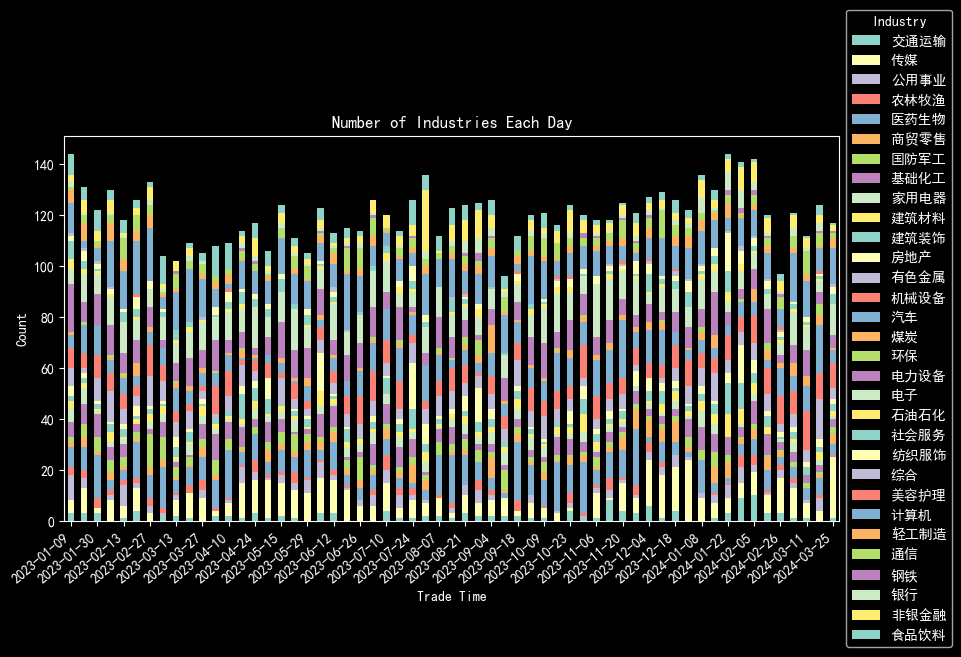

In [69]:
# Count the number of occurrences of each industry each day
industry_counts = (
    position_df_long.groupby(["trade_date", "industry_sw_first"])
    .size()
    .unstack(fill_value=0)
)

# Set the font properties to include Chinese characters
plt.rcParams["font.sans-serif"] = [
    "SimHei"
]  # Specify the font family to use (SimHei is a common Chinese font)
# Ensure that minus sign is displayed correctly for Chinese characters
plt.rcParams["axes.unicode_minus"] = False

# Format the x-axis tick labels to show only year-month-day
industry_counts.index = industry_counts.index.strftime("%Y-%m-%d")

# Plot the counts as a bar graph
industry_counts.plot(kind="bar", stacked=True, figsize=(10, 5))

# Set the frequency of x-axis tick labels to display every nth label
n = 2  # Display every n nd label
# plt.xticks(range(0, len(industry_counts.index), n), industry_counts.index[::n])
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=n))

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=40, ha='right')

plt.xlabel("Trade Time")
plt.ylabel("Count")
plt.title("Number of Industries Each Day")
plt.legend(title="Industry", bbox_to_anchor=(1, 0.5), loc="center left")
plt.show()

In [62]:
industry_counts

industry_sw_first,交通运输,传媒,公用事业,农林牧渔,医药生物,商贸零售,国防军工,基础化工,家用电器,建筑材料,...,纺织服饰,综合,美容护理,计算机,轻工制造,通信,钢铁,银行,非银金融,食品饮料
trade_date,,,,,,,,,,,,,,,,,,,,,
2023-01-09,3,5,10,3,8,2,2,6,5,3,...,2,1,0,12,5,1,0,2,3,8
2023-01-16,3,10,4,3,9,4,5,8,6,2,...,4,1,0,3,7,3,0,1,5,5
2023-01-30,3,2,0,4,17,1,6,9,1,1,...,2,1,0,5,1,2,0,0,4,8
2023-02-06,0,8,2,2,4,3,5,5,2,4,...,2,1,0,18,7,3,0,1,5,4
2023-02-13,1,5,8,2,4,1,4,5,2,1,...,1,0,0,15,5,8,0,1,1,5
2023-02-20,4,9,2,2,14,1,3,3,0,2,...,5,0,1,21,4,6,0,0,3,3
2023-02-27,0,3,3,3,9,3,13,2,3,3,...,3,0,0,21,5,4,0,2,5,2
2023-03-06,2,0,1,2,16,3,9,6,3,3,...,1,0,0,5,1,1,0,1,2,11
2023-03-13,2,6,2,1,5,1,4,2,1,1,...,0,0,0,15,1,6,1,0,4,0


In [67]:
industry_counts['计算机']

trade_date
2023-01-09    12
2023-01-16     3
2023-01-30     5
2023-02-06    18
2023-02-13    15
2023-02-20    21
2023-02-27    21
2023-03-06     5
2023-03-13    15
2023-03-20    21
2023-03-27    15
2023-04-03     7
2023-04-10     2
2023-04-17    11
2023-04-24     9
2023-05-08     9
2023-05-15    14
2023-05-22    12
2023-05-29    11
2023-06-05     7
2023-06-12     9
2023-06-19    22
2023-06-26    14
2023-07-03     8
2023-07-10     5
2023-07-17     9
2023-07-24     5
2023-07-31    16
2023-08-07    11
2023-08-14    15
2023-08-21     8
2023-08-28    12
2023-09-04    12
2023-09-11    15
2023-09-18     3
2023-09-25    19
2023-10-09    15
2023-10-16     6
2023-10-23     9
2023-10-30     9
2023-11-06    10
2023-11-13     7
2023-11-20     6
2023-11-27     3
2023-12-04     8
2023-12-11    15
2023-12-18     9
2023-12-25    12
2024-01-08    13
2024-01-15    11
2024-01-22     5
2024-01-29    11
2024-02-05    10
2024-02-19    10
2024-02-26     7
2024-03-04    19
2024-03-11    14
2024-03-18     9
202

In [64]:
# You can sum the industries across all dates and sort them in descending order
# industry_count_sorted = industry_counts.drop('Date', axis=1).sum().sort_values(ascending=False)